In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [4]:
df.head()  #to read the csv file

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
##cleaning up data
df.columns=["Month","Sales"]

In [6]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [10]:
df.drop(105,axis=0,inplace=True)

In [11]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [12]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [13]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [14]:
df.set_index('Month',inplace=True)

In [15]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [16]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Visualize the data

<AxesSubplot:xlabel='Month'>

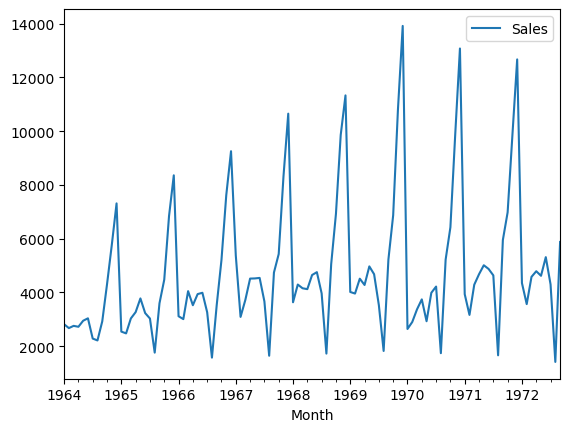

In [17]:
df.plot()

In [18]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [19]:
test_result=adfuller(df['Sales'])

In [20]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [21]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276248
p-value : 0.363915771660244
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [22]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [23]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [24]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [25]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [26]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

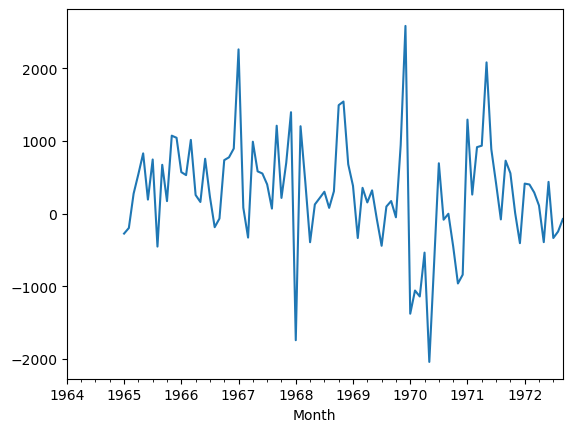

In [27]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model

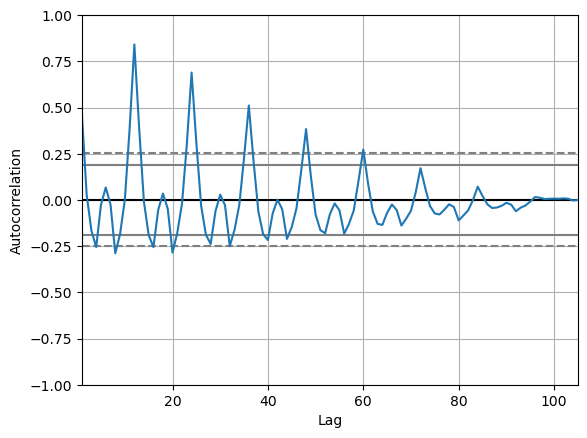

In [30]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()


## Autocorrelation and Partial Autocorrelation


In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


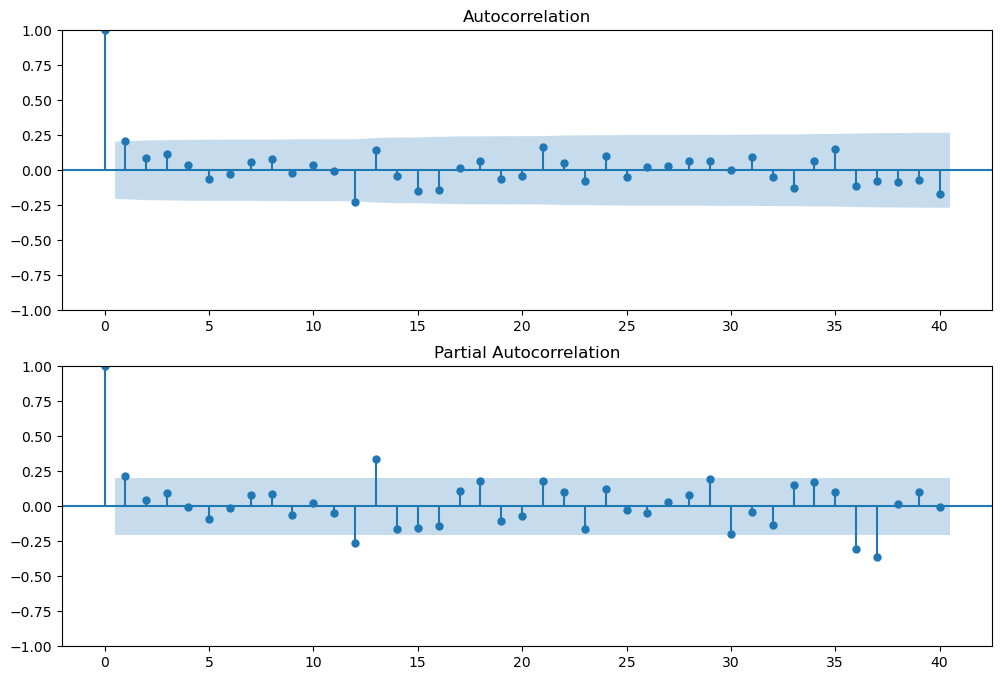

In [35]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)


## implementing ARIMA & SARIMA model

In [41]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [42]:
# ARIMA model
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sat, 17 Feb 2024   AIC                           1911.627
Time:                        23:08:02   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.998      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.305      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

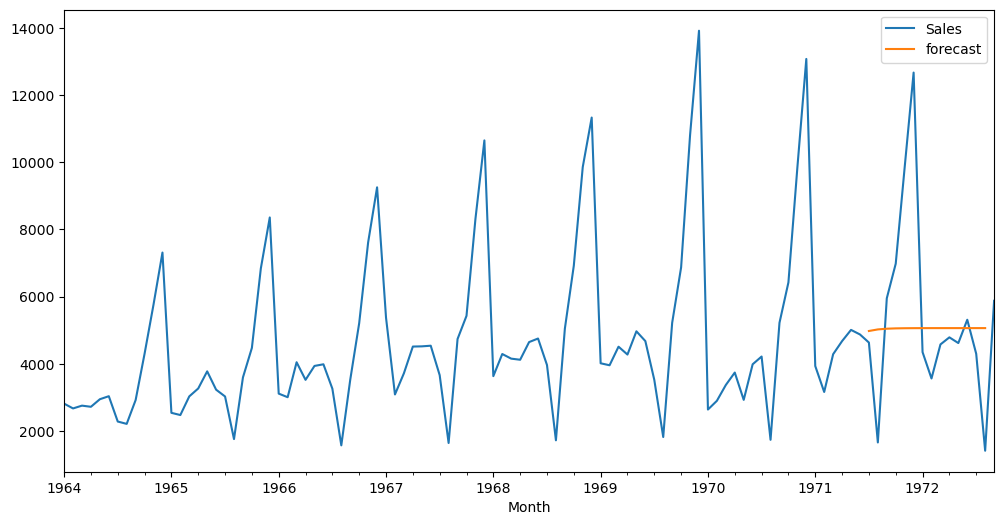

In [44]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,6))

In [45]:
import statsmodels.api as sm

In [46]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

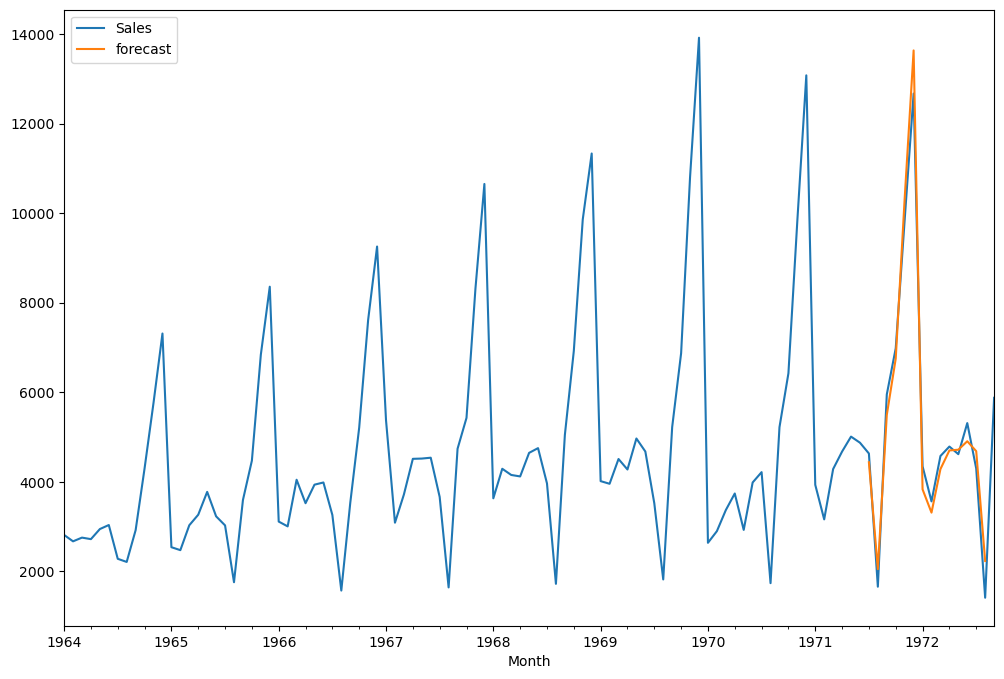

In [47]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [48]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [49]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [50]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [51]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

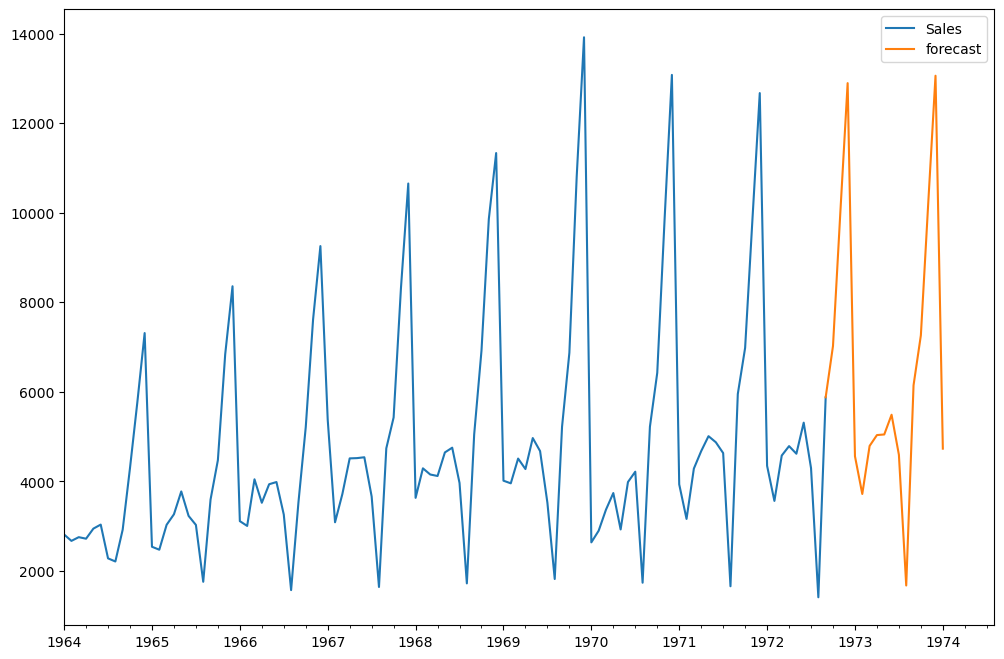

In [52]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

## Analysing and show the forecasting sale

In [53]:
import plotly.express as px

In [54]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [55]:
##cleaning up data
df.columns=["Month","Sales"]

In [56]:
#To view only top 5 rows

df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [57]:
#To view bottom 5 rows 

df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [58]:
#To get information in short or summarize manner
#Name of all columns, values are null or not null and their datatype kind of info can be seen by this way

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   106 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [60]:
#To get the mathmetical values/numbers like count, mean, min, max and stdv 

df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [61]:
#To get the unique number or type of segments/categories, we will be using unique method. 

df['Sales'].unique()

array([ 2815.,  2672.,  2755.,  2721.,  2946.,  3036.,  2282.,  2212.,
        2922.,  4301.,  5764.,  7312.,  2541.,  2475.,  3031.,  3266.,
        3776.,  3230.,  3028.,  1759.,  3595.,  4474.,  6838.,  8357.,
        3113.,  3006.,  4047.,  3523.,  3937.,  3986.,  3260.,  1573.,
        3528.,  5211.,  7614.,  9254.,  5375.,  3088.,  3718.,  4514.,
        4520.,  4539.,  3663.,  1643.,  4739.,  5428.,  8314., 10651.,
        3633.,  4292.,  4154.,  4121.,  4647.,  4753.,  3965.,  1723.,
        5048.,  6922.,  9858., 11331.,  4016.,  3957.,  4510.,  4276.,
        4968.,  4677.,  1821.,  5222.,  6872., 10803., 13916.,  2639.,
        2899.,  3370.,  3740.,  2927.,  4217.,  1738.,  5221.,  6424.,
        9842., 13076.,  3934.,  3162.,  4286.,  4676.,  5010.,  4874.,
        4633.,  1659.,  5951.,  6981.,  9851., 12670.,  4348.,  3564.,
        4577.,  4788.,  4618.,  5312.,  4298.,  1413.,  5877.,    nan])

In [63]:
#To get the unique number or type of segments/categories, we will be using unique method. 

df['Month'].unique()

array(['1964-01', '1964-02', '1964-03', '1964-04', '1964-05', '1964-06',
       '1964-07', '1964-08', '1964-09', '1964-10', '1964-11', '1964-12',
       '1965-01', '1965-02', '1965-03', '1965-04', '1965-05', '1965-06',
       '1965-07', '1965-08', '1965-09', '1965-10', '1965-11', '1965-12',
       '1966-01', '1966-02', '1966-03', '1966-04', '1966-05', '1966-06',
       '1966-07', '1966-08', '1966-09', '1966-10', '1966-11', '1966-12',
       '1967-01', '1967-02', '1967-03', '1967-04', '1967-05', '1967-06',
       '1967-07', '1967-08', '1967-09', '1967-10', '1967-11', '1967-12',
       '1968-01', '1968-02', '1968-03', '1968-04', '1968-05', '1968-06',
       '1968-07', '1968-08', '1968-09', '1968-10', '1968-11', '1968-12',
       '1969-01', '1969-02', '1969-03', '1969-04', '1969-05', '1969-06',
       '1969-07', '1969-08', '1969-09', '1969-10', '1969-11', '1969-12',
       '1970-01', '1970-02', '1970-03', '1970-04', '1970-05', '1970-06',
       '1970-07', '1970-08', '1970-09', '1970-10', 

In [64]:
#We found 3 different count for segment. So now, to get the exact number of count for each categories

df['Month'].value_counts()

#If we want to see the same data with indexing then we can go with one more step, which is as follows

df['Month'].value_counts().reset_index()

,index,Month
0,1964-01,1
1,1970-08,1
2,1970-06,1
3,1970-05,1
4,1970-04,1
...,...,...
101,1966-09,1
102,1966-08,1
103,1966-07,1
104,1966-06,1


# 1. Show the distribution of segment by pie plot.

In [80]:
# Number of customers in each segment 
segment_type = df['Month'].value_counts().reset_index()

In [81]:
# Assuming segment_type is a DataFrame with columns 'index' and 'Month
segment_type = segment_type.rename(columns={'index': 'Sales', 'Month': 'Total Customers'})

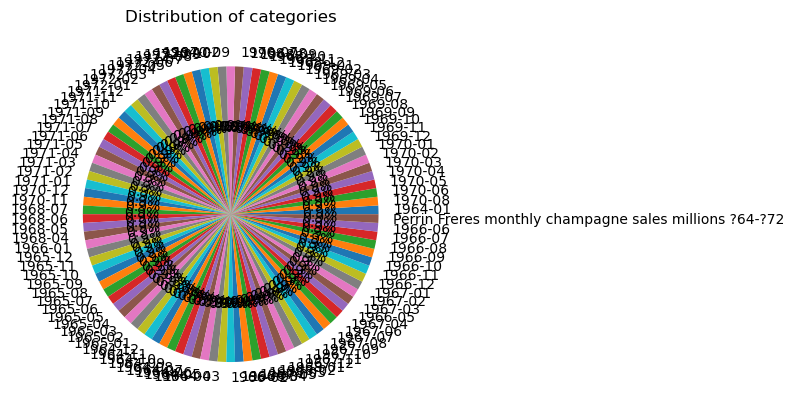

In [82]:
# Create the pie chart
plt.pie(segment_type['Total Customers'], labels=segment_type['Sales'], autopct='%1.1f%%')
plt.title('Distribution of categories')
plt.show()